# The Sparks Foundation: Graduate Rotational Internship Program

## Domain : Data Science and Business Analytics

### Task 1: To predict the percentage of an student based on the no. of study hours.

#### Author: Anurag Bora

###### Importing required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

##### Reading the data 

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print(data.shape)

data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Visualizing the data

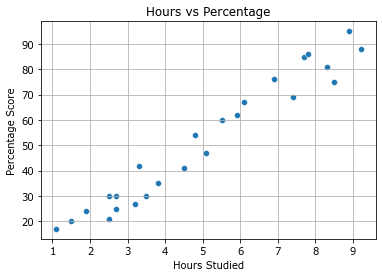

In [7]:
sns.scatterplot(x='Hours', y='Scores', data=data)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

##### Preparing the data

In [16]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


###### Training the Algorithm

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

coeff = lr.coef_
print(f'The coefficient is {coeff}')

intercept = lr.intercept_
print(f'The intercept is {intercept}')

The coefficient is [9.91065648]
The intercept is 2.018160041434683


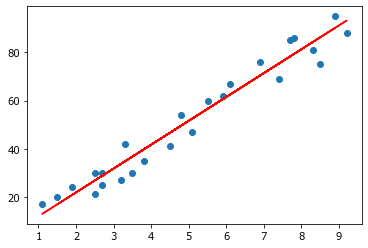

In [24]:
# Plotting the regression line
line = coeff*X+intercept

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='r')
plt.show()

###### Making Predictions

In [25]:
print(X_test) 
y_pred = lr.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


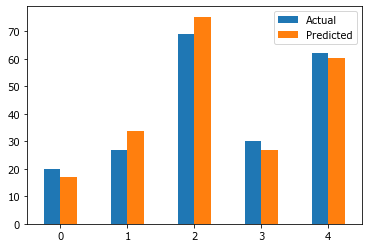

In [35]:
# Comparing the Actual values and the Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

##### Predicting the score if a student studies for 9.25 hrs/ day

In [31]:
hours = 9.25
pred = lr.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


###### Model Evaluation

In [34]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}') 
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}') 
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}') 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
